In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [2]:
tmp_df = pd.read_csv('../data/행정동_기준_동별데이터_버스추가_1028.csv')
pd.set_option('display.max_columns',35)
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HOSPITAL_NUM',
       'HIGH_SCH_NUM', 'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM',
       'DPTM_NUM', 'CON_NUM', 'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM',
       'CAFE_NUM', 'BUS_NUM', 'BIKE_NUM', 'ANI_HSPT_NUM', 'ACADEMY_NUM', 'GU',
       'DONG', 'DONG_CODE', 'BUS_CNT'],
      dtype='object')

In [4]:
tmp_df = tmp_df[['GU','DONG','DONG_CODE','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BUS_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
tmp_df

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.000000,0.000000,0.000000,11.666667,3.0,0.0,0.000000,1.0,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.000000,10.000000,0.000000,74.666667,0.0,18.0,3.000000,0.0,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.000000,10.000000,0.000000,7.000000,1.0,3.0,0.000000,0.0,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,1.0,2.0,2.000000,1.0,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,18.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.000000,1.0,5.0,5.000000,0.0,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,25.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,1.000000,120.000000,0.0,18.0,9.000000,1.0,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,22.000000,9.000000,8.000000,100.000000,28.0


In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(tmp_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM','BUS_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM','SAFE_DLVR_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,BUS_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,SAFE_DLVR_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,11.666667,2.000000,1.0,56.666667,1.000000,11.666667,4.333333,0.0,4.000000,39.666667,2.000000,2.000000,3.0,18.000000,0.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,18.666667,3.000000,0.0,41.666667,0.000000,74.666667,17.333333,0.0,20.000000,100.666667,2.000000,0.000000,0.0,19.000000,10.000000,10.333333,0.000000,7.333333,0.0,22848.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,8.000000,1.000000,0.0,22.000000,0.000000,7.000000,2.000000,0.0,2.000000,52.000000,0.000000,1.000000,1.0,2.000000,10.000000,1.000000,0.000000,1.000000,0.0,14112.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,18.000000,1.000000,1.0,41.000000,0.000000,4.000000,1.000000,0.0,8.000000,30.000000,4.000000,1.000000,1.0,24.000000,0.000000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,25.000000,1.000000,0.0,21.000000,0.000000,14.000000,5.000000,0.0,6.000000,36.000000,0.000000,0.000000,1.0,28.000000,0.000000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,11.000000,0.333333,1.0,52.000000,0.666667,60.000000,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,11.000000,0.333333,1.0,52.000000,0.666667,60.000000,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,22.000000,0.000000,1.0,119.000000,1.000000,120.000000,35.000000,0.0,76.000000,63.000000,6.000000,1.000000,0.0,100.000000,20.000000,10.000000,1.000000,2.000000,0.0,4327.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,7.000000,1.000000,0.0,32.500000,0.000000,14.500000,10.000000,0.0,17.000000,17.500000,2.000000,1.500000,1.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [7]:
# 불필요 컬럼 제거
tmp = tmp.drop(['CCTV_NUM','SPORT_NUM','FIRE_NUM','BUS_NUM'],axis=1)

In [8]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,SAFE_DLVR_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.622066,43.866197,12.169014,0.063380,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.503566,42.152057,7.266001,0.207678,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,23.500000,8.000000,0.000000,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.666667,34.500000,11.000000,0.000000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,1.000000,48.250000,14.000000,0.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,3.500000,357.500000,50.000000,1.500000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000


### 1.2 특성 간 결합 및 컬럼 정리

In [9]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','SAFE_DLVR_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVINIENCE','EDUCATION','PARANTING']

In [10]:
def assembling(df,sum_list,name_list): # 큰 카테고리로 묶는 함수
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        x = df[sum_list[j]]
        k = []

        for i in range(len(df)):
            sum_k = sum(x.loc[i]) # 합하는 데 가중치 미부여 상태
            k.append(sum_k)

        x[name_list[j]] = k
        x = x.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(x)
    del(df_tmp[0])
    return df_tmp

In [11]:
# 컬럼 끼리 더한 데이터
y = assembling(tmp_df,sum_list,name_list)
y

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING
0,20.000000,3.0,16.000000,43.666667,25.0,7.333333
1,29.000000,3.0,92.000000,120.666667,21.0,20.333333
2,19.000000,1.0,9.000000,54.000000,4.0,11.000000
3,14.000000,1.0,5.000000,38.000000,30.0,5.000000
4,44.000000,1.0,19.000000,42.000000,29.0,10.000000
...,...,...,...,...,...,...
421,17.333333,1.0,72.666667,86.333333,65.0,20.666667
422,15.333333,1.0,72.666667,86.333333,65.0,20.666667
423,38.000000,1.0,155.000000,139.000000,107.0,30.000000
424,10.000000,1.0,24.500000,34.500000,42.5,0.000000


In [12]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df,asmb_df,sum_list,name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE'] + name_list +['KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [13]:
tmp_df = data_frame_redirect(tmp_df,y,sum_list,name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'TRANSPORT', 'SECURITY', 'HEALTH',
       'CONVINIENCE', 'EDUCATION', 'PARANTING', 'KIDS_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'SPORT_NUM', 'GYM_NUM',
       'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

**Noise Categorizing**

In [14]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

index
0      18816.000000
1      22848.000000
2      14112.000000
3       6048.000000
4       4032.000000
           ...     
421     1442.333333
422     1442.333333
423     4327.000000
424     2163.500000
425     2163.500000
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [15]:
for i in range(len(noise)):
    if (noise[i]<400):
        noise[i] = 6
    elif (noise[i]>=400 and noise[i]<800):
        noise[i] = 5
    elif (noise[i]>=800 and noise[i]<1200):
        noise[i] = 4
    elif (noise[i]>=1200 and noise[i]<1600):
        noise[i] = 3
    elif (noise[i]>=1600 and noise[i]<3200):
        noise[i] = 2
    else:
        noise[i] = 1
noise

index
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
421    3.0
422    3.0
423    1.0
424    2.0
425    2.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [16]:
noise.value_counts()

6.0    95
5.0    89
1.0    80
2.0    72
4.0    56
3.0    34
Name: NOISE_VIBRATION_NUM, dtype: int64

In [17]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
index,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.0,1.0,3.000000,0.0,18.0,9.000000,10.000000,8.000000


**MinMaxScaling**

In [18]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
index,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.0,1.0,3.000000,0.0,18.0,9.000000,10.000000,8.000000


In [19]:
col = df.columns[3:]
data = df[col]

In [20]:
scaler = MinMaxScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[0.16040956, 0.66666667, 0.03557814, ..., 0.        , 0.04166667,
        0.16666667],
       [0.25255973, 0.66666667, 0.22871665, ..., 0.09230769, 0.20833333,
        0.08333333],
       [0.15017065, 0.22222222, 0.01778907, ..., 0.        , 0.04166667,
        0.        ],
       ...,
       [0.3447099 , 0.22222222, 0.3888183 , ..., 0.27692308, 0.41666667,
        0.66666667],
       [0.05802048, 0.22222222, 0.05717916, ..., 0.09230769, 0.08333333,
        0.125     ],
       [0.221843  , 0.22222222, 0.05717916, ..., 0.09230769, 0.08333333,
        0.125     ]])

In [21]:
df[col] = df_scaled
data = df[col]

## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [22]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

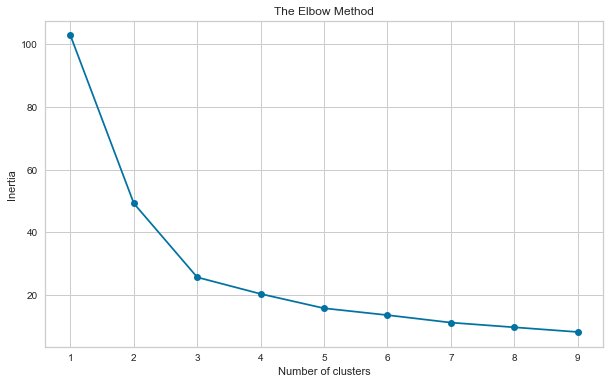

In [23]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [25]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,
0,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
1,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236
2,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31


## 소음 자료  카테고리화 진행 후 minMaxScale 적용한 데이터를 3개로 군집화

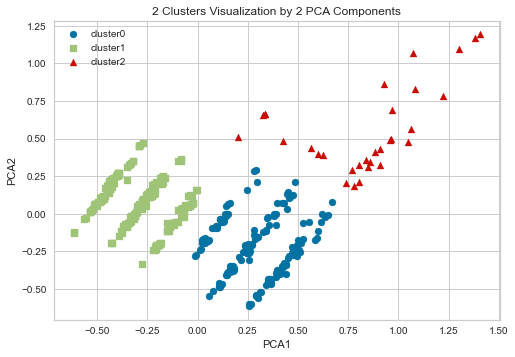

In [26]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

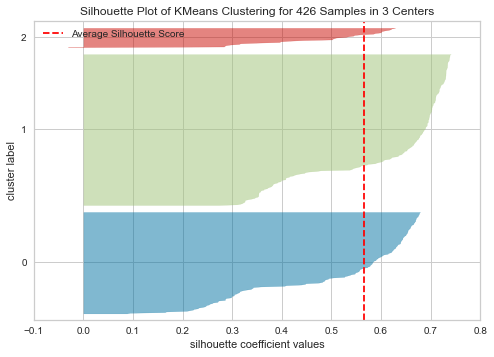

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()
# sil_avg = silhouette_score(data,kmeans.fit(pca_transformed))
# print(sil_avg)

In [29]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.369


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [30]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [31]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,23.900659,1.225681,49.146481,61.705720,61.123360,33.141045,0.413836,1.225696,0.130937,1.836478,0.886688,0.210692,6.361306,3.195223,4.126205,1.946825
std,10.541467,0.779294,27.792941,32.681650,60.419697,24.722813,0.634163,1.507079,0.281826,0.745231,1.530415,0.710196,4.594083,2.904149,2.484155,1.288875
min,5.000000,0.000000,2.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,29.000000,39.000000,28.000000,13.666667,0.000000,0.250000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000
50%,21.000000,1.000000,43.000000,55.000000,47.400000,27.333333,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,5.000000,3.000000,4.000000,2.000000
75%,29.000000,2.000000,70.416667,74.916667,79.000000,50.541667,0.550000,1.625000,0.000000,2.000000,1.000000,0.000000,8.250000,4.000000,5.666667,2.583333
max,61.000000,3.000000,129.000000,170.500000,409.250000,120.666667,3.000000,9.500000,1.000000,3.000000,12.000000,5.000000,26.000000,13.000000,11.000000,8.000000


**km_cluster == 1**

In [32]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [33]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,19.271555,1.088595,44.161022,47.683258,52.556896,34.033328,0.485840,0.663267,0.159488,5.182203,1.105473,0.134181,5.838852,2.617766,3.169915,1.875515
std,9.204766,0.528688,15.204586,17.789705,37.824288,19.419825,0.447893,0.542215,0.177404,0.769540,0.963157,0.449363,3.249930,1.697850,1.456585,0.813642
min,4.333333,0.000000,5.000000,3.166667,3.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,13.541667,0.812500,33.666667,37.333333,30.636364,20.000000,0.166667,0.285714,0.000000,5.000000,0.500000,0.000000,3.500000,1.333333,2.166667,1.400000
50%,17.600000,1.000000,44.666667,47.333333,43.750000,31.500000,0.375000,0.500000,0.125000,5.000000,1.000000,0.000000,5.000000,2.000000,3.000000,1.714286
75%,22.525000,1.363636,52.375000,57.500000,58.125000,41.875000,0.666667,1.000000,0.250000,6.000000,1.600000,0.000000,7.822222,3.500000,3.888889,2.500000
max,83.272727,2.500000,77.000000,119.250000,215.600000,99.000000,2.000000,2.250000,0.666667,6.000000,4.400000,3.000000,20.000000,7.000000,7.800000,4.500000


**km_cluster == 2**

In [34]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [35]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,47.345430,1.748656,181.764785,217.694892,143.772849,64.216398,1.307796,6.567204,0.920699,1.612903,3.455645,0.188172,25.276882,13.521505,11.510753,4.510753
std,23.262818,0.980745,98.774005,93.363305,91.353645,49.518658,1.305999,4.494875,0.792204,1.054433,3.336751,0.555681,12.328159,9.329711,5.339395,2.654551
min,11.000000,0.750000,50.000000,80.000000,16.000000,4.000000,0.000000,1.500000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,3.000000,0.000000
25%,32.062500,1.000000,100.250000,151.875000,91.500000,21.000000,0.000000,3.375000,0.625000,1.000000,1.500000,0.000000,18.000000,5.000000,8.625000,3.000000
50%,39.750000,1.500000,168.500000,186.000000,125.000000,53.000000,1.000000,5.250000,1.000000,1.000000,2.500000,0.000000,20.750000,13.000000,10.000000,4.500000
75%,62.750000,2.000000,226.541667,241.000000,197.500000,100.250000,2.000000,8.250000,1.000000,2.000000,3.750000,0.000000,30.000000,19.625000,12.541667,5.500000
max,102.000000,4.500000,395.500000,413.500000,492.250000,207.000000,4.250000,18.500000,4.000000,4.000000,15.000000,3.000000,60.000000,32.500000,24.000000,12.000000


### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [36]:
df_0 = df[df['km_cluster'] == 0]
df_0 = df_0.drop('km_cluster',axis=1)
df_0

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000,0.350692,-0.459696
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000,0.600188,-0.115253
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000,0.301725,-0.563761
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000,0.339530,-0.474713
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000,0.367264,-0.467530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,강동구,성내1동,1174064000,11.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,0.141277,-0.012433
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,0.151971,-0.001860
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,0.148406,-0.005384


In [37]:
col_0 = df_0.columns[3:-2]
data_0 = df_0[col_0].values

In [38]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000,-49.216475,-23.388011
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000,-16.829813,78.718748
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000,-68.543275,-11.004499
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000,-48.652397,-35.064674
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000,-43.587603,-21.770441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,강동구,성내1동,1174064000,11.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,12.667563,26.653135
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,12.848400,27.206598
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,12.788121,27.022110


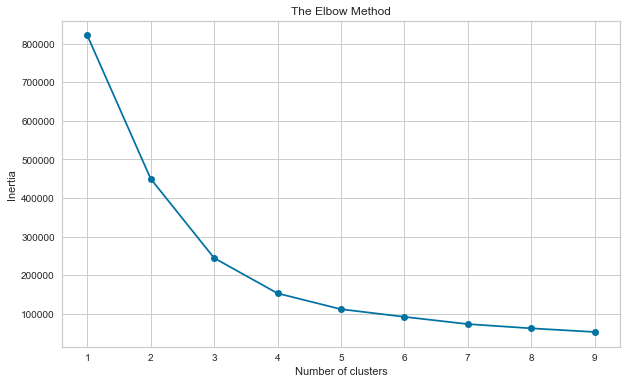

In [39]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [41]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91


## 1차 군집화 자료 중 0번 군집에 대한 2차 군집화

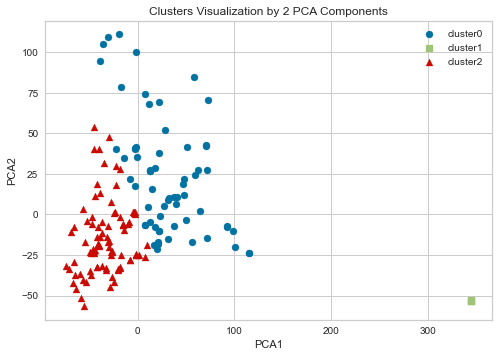

In [42]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

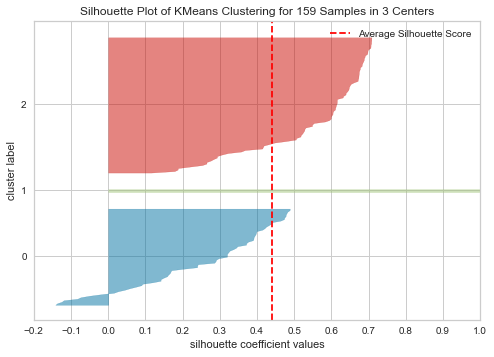

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 159 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [44]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.347


#### 2.2.2 km_cluster == 1

- Elbow 관측

In [45]:
df_1 = df[df['km_cluster'] == 1]
df_1 = df_1.drop('km_cluster',axis=1)
df_1

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
12,종로구,창신1동,1111067000,8.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-0.423738,-0.193090
13,종로구,창신2동,1111068000,5.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-0.429084,-0.198377
14,종로구,창신3동,1111069000,6.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-0.427302,-0.196615
15,종로구,숭인1동,1111070000,10.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-0.205517,-0.211490
16,종로구,숭인2동,1111071000,9.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-0.207300,-0.213252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,송파구,잠실2동,1171067000,15.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,-0.239140,0.116493
403,송파구,잠실3동,1171068000,28.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,-0.215970,0.139400
404,송파구,잠실4동,1171069000,13.500000,0.50,75.000000,39.000000,58.5,16.000000,0.50,1.50,0.000000,4.0,1.0,0.0,7.5,2.500000,3.50,1.500000,-0.120714,-0.065124


In [46]:
col_1 = df_1.columns[3:-2]
data_1 = df_1[col_1].values

In [47]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
12,종로구,창신1동,1111067000,8.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-60.805432,-25.401382
13,종로구,창신2동,1111068000,5.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-60.943133,-25.855627
14,종로구,창신3동,1111069000,6.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-60.897233,-25.704212
15,종로구,숭인1동,1111070000,10.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-57.965928,-21.298746
16,종로구,숭인2동,1111071000,9.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-58.011829,-21.450162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,송파구,잠실2동,1171067000,15.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,22.261084,-21.260614
403,송파구,잠실3동,1171068000,28.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,22.857791,-19.292219
404,송파구,잠실4동,1171069000,13.500000,0.50,75.000000,39.000000,58.5,16.000000,0.50,1.50,0.000000,4.0,1.0,0.0,7.5,2.500000,3.50,1.500000,7.813790,-11.139142


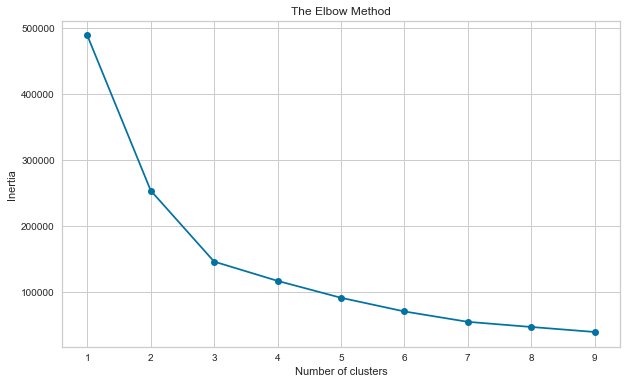

In [48]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3

In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [50]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94


## 1차 군집화 자료 중 1번 군집에 대한 2차 군집화

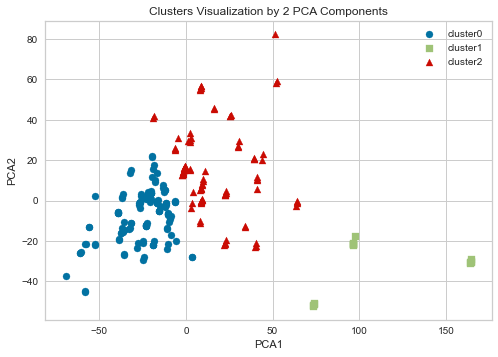

In [51]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

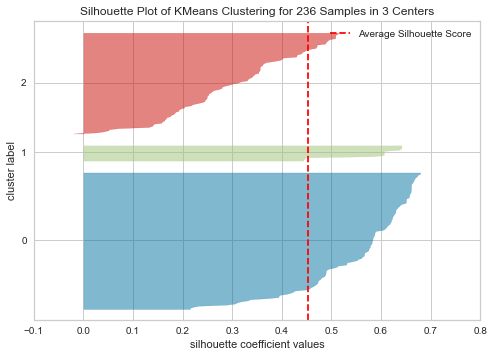

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 236 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [53]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.349


#### 2.2.3 km_cluster == 2

- Elbow 관측

In [54]:
df_2 = df[df['km_cluster'] == 2]
df_2 = df_2.drop('km_cluster',axis=1)
df_2

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
8,종로구,종로1.2.3.4가동,1111061500,80.500000,3.000000,204.000000,298.166667,105.500000,70.333333,1.000000,13.333333,1.000000,1.0,4.000,0.000000,10.000000,5.000000,18.000000,0.000000,1.063512,0.564612
19,중구,명동,1114055000,59.000000,4.500000,187.500000,363.000000,20.500000,44.000000,0.000000,18.500000,3.000000,1.0,1.000,0.000000,18.000000,3.000000,7.000000,0.000000,1.048138,0.479096
40,용산구,한강로동,1117062500,53.000000,2.000000,92.000000,159.000000,16.000000,53.000000,4.000000,6.000000,0.000000,1.0,4.000,0.000000,8.000000,4.000000,13.000000,2.000000,0.770299,0.292221
191,은평구,진관동,1138069000,84.000000,1.000000,50.000000,80.000000,195.000000,207.000000,2.000000,2.000000,0.000000,2.0,2.000,0.000000,7.000000,4.000000,12.000000,6.000000,0.599609,0.397526
195,서대문구,신촌동,1141058500,35.000000,2.000000,99.000000,240.000000,79.000000,4.000000,2.000000,11.000000,1.000000,1.0,8.000,0.000000,11.000000,0.000000,20.000000,0.000000,0.860395,0.346999
214,마포구,서교동,1144066000,58.000000,4.500000,210.500000,355.500000,217.500000,17.500000,1.000000,8.500000,1.000000,1.0,15.000,0.000000,39.500000,4.000000,24.000000,9.500000,1.303981,1.094964
221,마포구,상암동,1144074000,84.000000,2.000000,74.000000,139.000000,113.000000,119.000000,0.000000,5.000000,1.000000,1.0,1.000,3.000000,17.000000,6.000000,21.000000,4.000000,0.910276,0.322851
240,강서구,염창동,1150051000,44.000000,1.000000,79.500000,99.500000,153.000000,92.500000,4.250000,2.000000,1.000000,2.0,3.250,0.000000,20.000000,9.250000,5.750000,3.750000,0.564939,0.437542
254,강서구,발산1동,1150061100,70.750000,1.500000,101.500000,157.750000,217.250000,108.000000,1.500000,2.750000,0.000000,2.0,2.500,0.500000,23.000000,5.000000,7.000000,4.500000,0.624147,0.390368


In [55]:
col_2 = df_2.columns[3:-2]
data_2 = df_2[col_2].values

In [56]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
8,종로구,종로1.2.3.4가동,1111061500,80.500000,3.000000,204.000000,298.166667,105.500000,70.333333,1.000000,13.333333,1.000000,1.0,4.000,0.000000,10.000000,5.000000,18.000000,0.000000,51.846962,-71.415640
19,중구,명동,1114055000,59.000000,4.500000,187.500000,363.000000,20.500000,44.000000,0.000000,18.500000,3.000000,1.0,1.000,0.000000,18.000000,3.000000,7.000000,0.000000,69.232949,-177.028781
40,용산구,한강로동,1117062500,53.000000,2.000000,92.000000,159.000000,16.000000,53.000000,4.000000,6.000000,0.000000,1.0,4.000,0.000000,8.000000,4.000000,13.000000,2.000000,-124.197455,-96.197089
191,은평구,진관동,1138069000,84.000000,1.000000,50.000000,80.000000,195.000000,207.000000,2.000000,2.000000,0.000000,2.0,2.000,0.000000,7.000000,4.000000,12.000000,6.000000,-205.734124,88.649706
195,서대문구,신촌동,1141058500,35.000000,2.000000,99.000000,240.000000,79.000000,4.000000,2.000000,11.000000,1.000000,1.0,8.000,0.000000,11.000000,0.000000,20.000000,0.000000,-49.047076,-82.152086
214,마포구,서교동,1144066000,58.000000,4.500000,210.500000,355.500000,217.500000,17.500000,1.000000,8.500000,1.000000,1.0,15.000,0.000000,39.500000,4.000000,24.000000,9.500000,124.672249,-3.413996
221,마포구,상암동,1144074000,84.000000,2.000000,74.000000,139.000000,113.000000,119.000000,0.000000,5.000000,1.000000,1.0,1.000,3.000000,17.000000,6.000000,21.000000,4.000000,-147.788700,-8.229621
240,강서구,염창동,1150051000,44.000000,1.000000,79.500000,99.500000,153.000000,92.500000,4.250000,2.000000,1.000000,2.0,3.250,0.000000,20.000000,9.250000,5.750000,3.750000,-150.912455,49.111663
254,강서구,발산1동,1150061100,70.750000,1.500000,101.500000,157.750000,217.250000,108.000000,1.500000,2.750000,0.000000,2.0,2.500,0.500000,23.000000,5.000000,7.000000,4.500000,-94.221049,76.665231


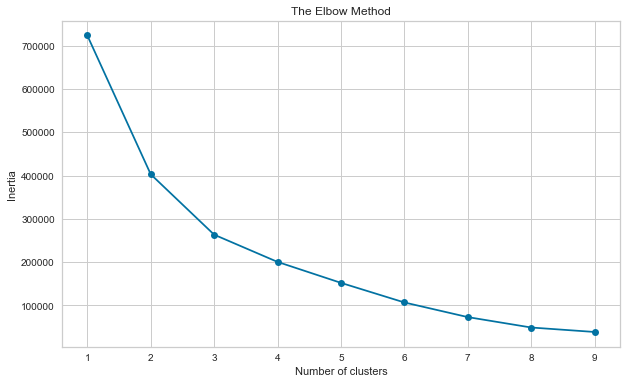

In [57]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [59]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


## 1차 군집화 자료 중 2번 군집에 대한 2차 군집화

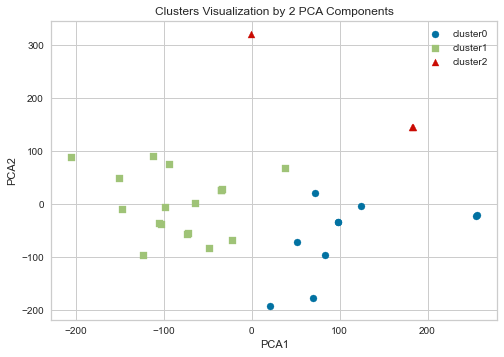

In [60]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

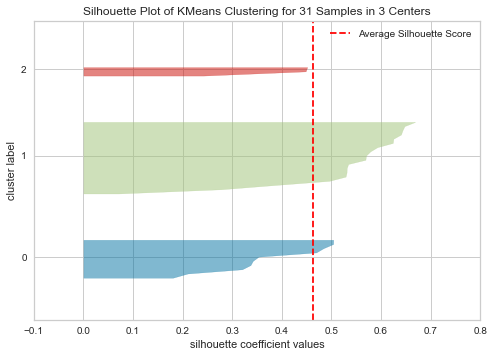

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 31 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [62]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.364
